In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras import optimizers
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:/Users/Giso Lab/Documents/USC') # set the directory input files are in
df = pd.DataFrame(columns = [])
features = np.zeros(100)
targets = np.zeros((100,1089*2))
t=0
for i in glob.glob("velocity_*.csv"):
    st = i.find('_')
    ed = i.find('.')
    features[t] = int(i[st+1:ed])*50
    tmp = np.loadtxt(i, delimiter=',', skiprows=1)
    targets[t,:1089] = tmp[:1089,1]
    targets[t,1089:] = tmp[:1089,2] 
    t+=1

explain variables
[  50.  500. 5000.  550.  600.  650.  700.  750.  800.  850.]
explained variables
[[ 5.2388e-05  1.2524e-04  1.2110e-04 ... -9.3324e-02 -1.5178e-01
  -2.1327e-01]
 [ 3.1211e-05  1.4832e-04  3.6528e-04 ... -8.2017e-02 -1.7544e-01
  -2.5588e-01]
 [ 3.7950e-05  1.2466e-03  4.0269e-03 ... -2.7141e-02 -1.1207e-01
  -1.9359e-01]
 ...
 [ 3.3997e-05  1.7650e-04  4.5735e-04 ... -7.4823e-02 -1.7100e-01
  -2.5288e-01]
 [ 3.8289e-05  1.8441e-04  4.6899e-04 ... -7.3481e-02 -1.6996e-01
  -2.5203e-01]
 [ 4.3437e-05  1.9317e-04  4.8041e-04 ... -7.2174e-02 -1.6891e-01
  -2.5115e-01]]
Epoch 1/50
90/90 [==============================] - 12s 2ms/step - loss: 0.0094
Epoch 2/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 3/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4/50
90/90 [==============================] - 0s 2ms/step - loss: 9.6869e-04
Epoch 5/50
90/90 [==============================] - 0s 2ms/step - loss: 4.5571e-04
Epoc

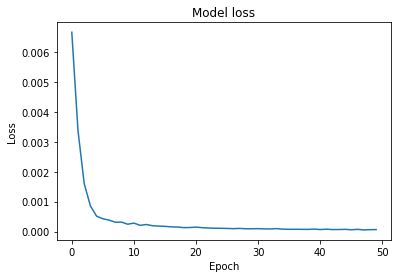

In [3]:
# check data
print("explain variables\n{}".format(features[:10]))
print("explained variables\n{}".format(targets[:10]))

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size=0.9)

# set model referring Zhou and Ooka (2020) but can try anything!
# should use Functional API rather than Sequencial API...
model = Sequential()
model.add(Dense(96, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(1089*2, input_dim=96))
model.add(Activation('linear'))

rmsprop = optimizers.RMSprop(learning_rate=0.0005, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer=rmsprop, loss='mean_squared_error') #, metrics=['accuracy'])

# train
history = model.fit(x_train, y_train, epochs=50, batch_size=1)

# predict the labels of test data
pred = model.predict(x_test)

# Plot loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [6]:
# change the shape for visualization
CFD = np.zeros((10,33,33,2))
DNN = np.zeros((10,33,33,2))
for i in range(np.size(x_test)):
    CFD[i,:,:,0] = y_test[i,:1089].reshape(33,33)
    DNN[i,:,:,0] = pred[i,:1089].reshape(33,33)
    CFD[i,:,:,1] = y_test[i,1089:].reshape(33,33)
    DNN[i,:,:,1] = pred[i,1089:].reshape(33,33)

In [7]:
def draw_heatmap(data1,data2,Re,uw):
    fig = plt.figure(figsize=(10.0, 5.0))
    if uw == 0:
        name, vmin, vmax = 'U', -0.1, 0.8
    elif uw == 1:
        name, vmin, vmax = 'W', -0.2, 0.2
    else:
        print('ERROR! Please set 0 for u and 1 for w')

    ax1 = fig.add_subplot(1,2,1)
    heatmap = ax1.pcolor(data1, cmap='jet', vmin=vmin, vmax=vmax)
    ax1.set_title('DNN for '+name+' at Re= '+str(Re))

    ax2 = fig.add_subplot(1,2,2)
    heatmap = ax2.pcolor(data2, cmap='jet', vmin=vmin, vmax=vmax)
    ax2.set_title('CFD for '+name+' at Re= '+str(Re))

    os.makedirs('img/DNN', exist_ok=True)
    plt.savefig('img/DNN/image_DNN_'+name+'_'+str(Re)+'.png') # set img folder
    plt.show()
    
    return heatmap

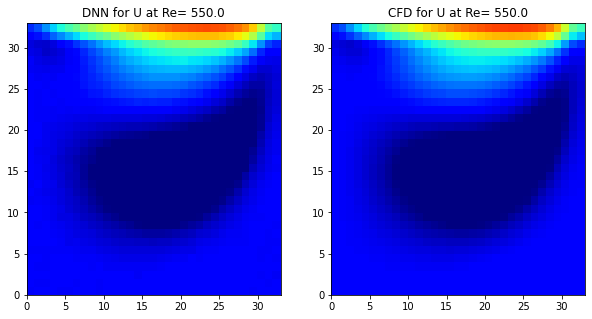

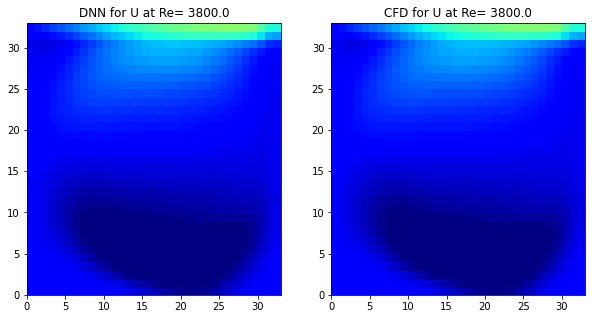

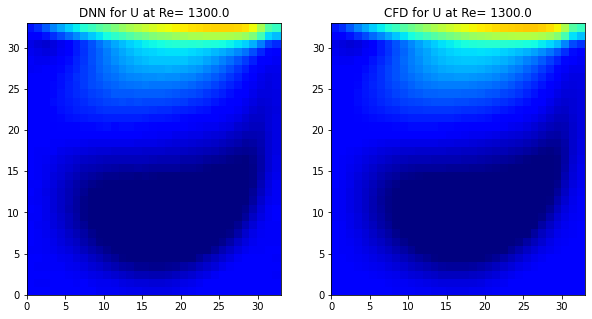

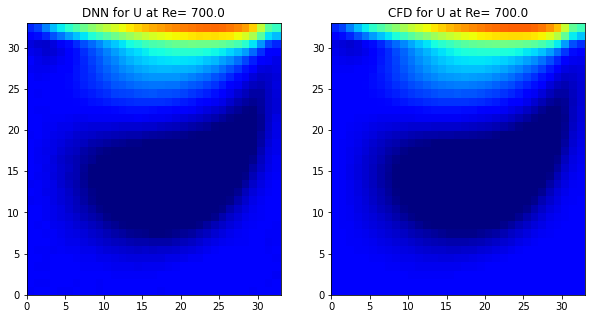

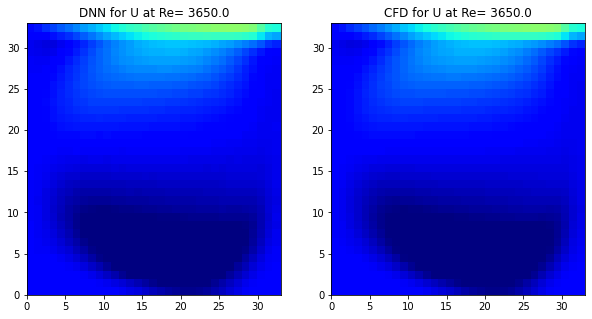

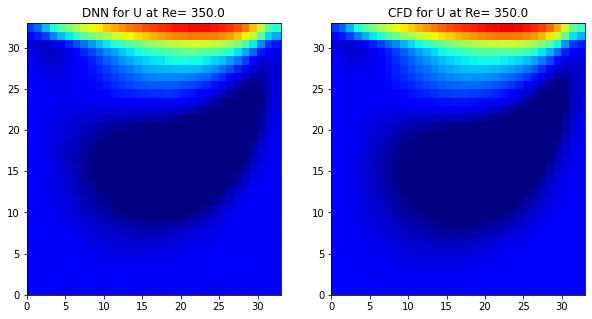

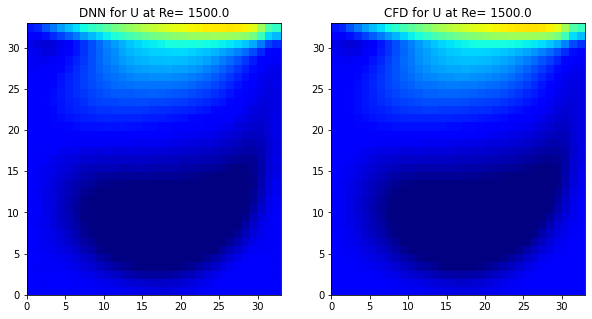

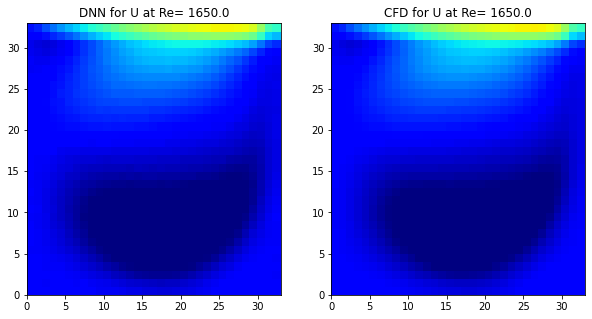

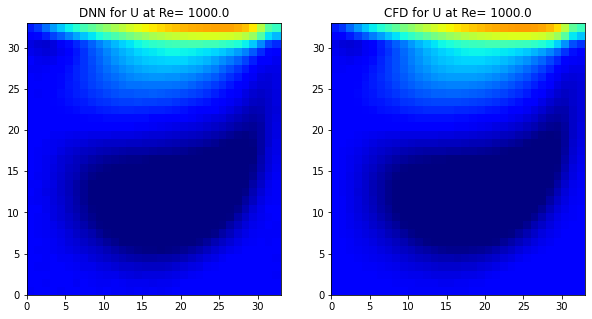

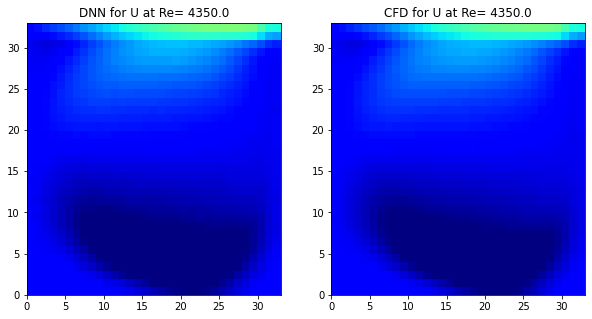

In [8]:
for i in range(np.size(x_test)):
    draw_heatmap(DNN[i,:,:,0],CFD[i,:,:,0],x_test[i],0)

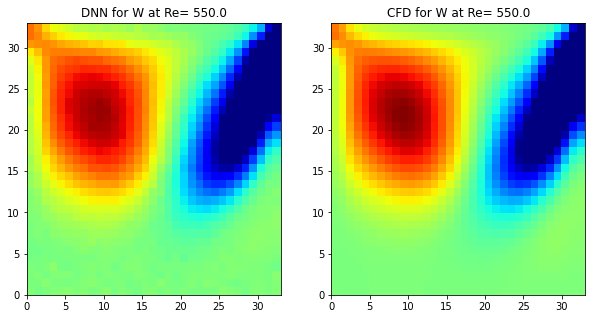

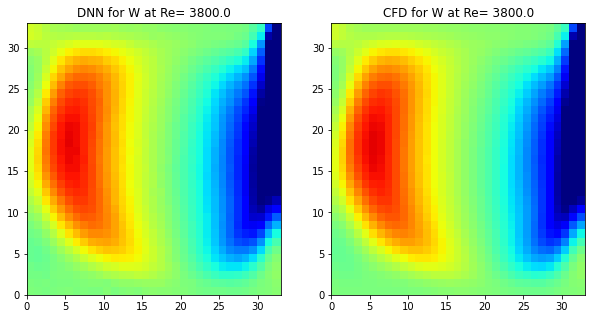

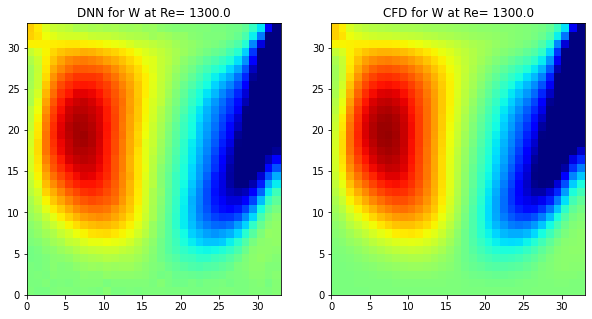

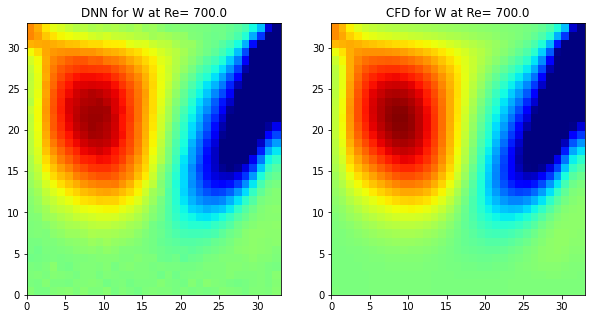

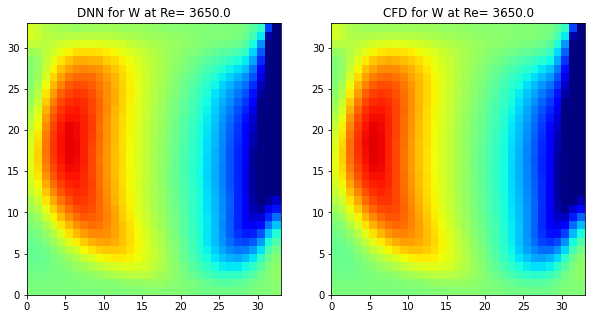

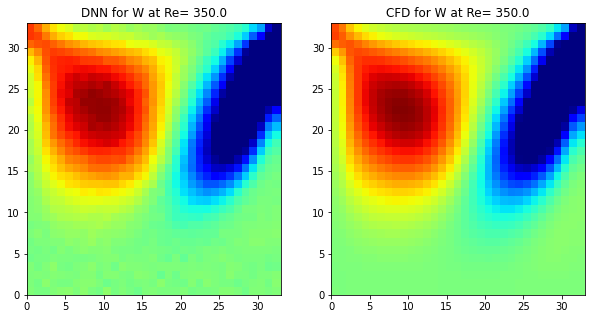

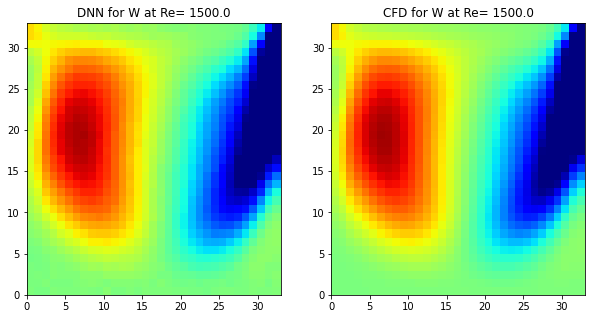

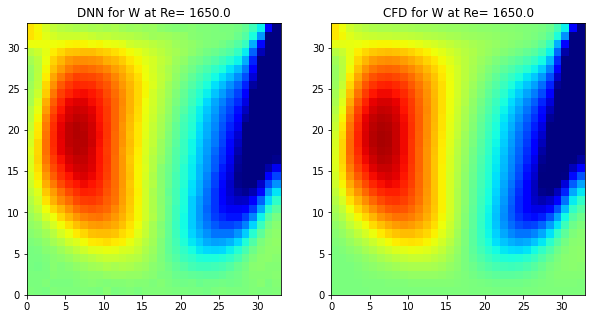

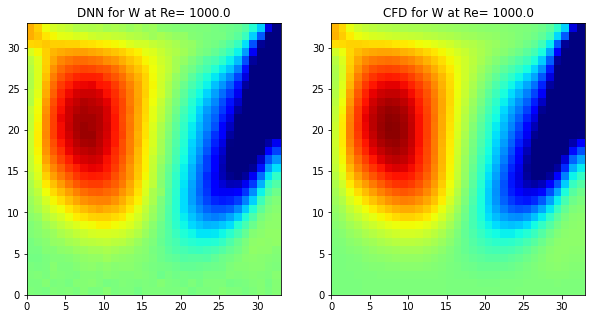

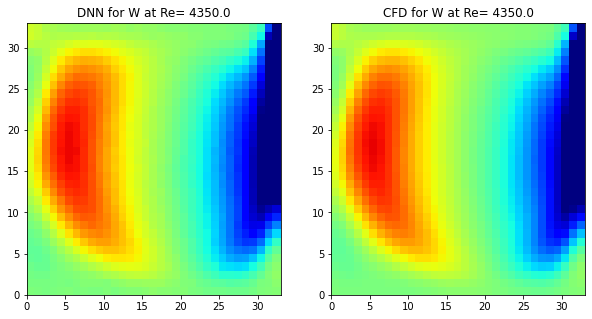

In [9]:
for i in range(np.size(x_test)):
    draw_heatmap(DNN[i,:,:,1],CFD[i,:,:,1],x_test[i],1)